# 5 Statistical Evaluation of Cancer Mutations and Natural Variants

Cancer Integration with Data from NCGA < https://portal.gdc.cancer.gov/

There is an API, however since we are only dealing with 31 GAIN domains / 32 receptors, I grabbed all data in JSON. https://docs.gdc.cancer.gov/

*To run this notebook, you will need to download the GAIN-GRN data from the zenodo repository:* 

https://dx.doi.org/10.5281/zenodo.12515545/gaingrn_data.tgz : download via `gaingrn.utils.io.download_data()` into `path/to/GAIN-GRN/data`

In [1]:
%matplotlib inline
import glob, re
import matplotlib.pyplot as plt
import pandas as pd
import gaingrn.utils.io
import gaingrn.utils.mutation_utils
from gaingrn.utils.variant_classes import *

jsons = glob.glob("../data/gain_json/*.json")
csvs = glob.glob("../data/snp_mane/*csv")
oneletter = {'Ala':'A','Arg':'R','Asn':'N','Asp':'D','Cys':'C','Gln':'Q','Glu':'E','Gly':'G','His':'H','Ile':'I','Leu':'L','Lys':'K','Met':'M','Phe':'F',
             'Pro':'P','Pyl':'O','Ser':'S','Thr':'T','Trp':'W','Tyr':'Y','Val':'V'}

We need to construct a new dictionary where the indexing itself locates to. This will be appended to the GainDomain objects.
For each GAIN domain within this collection, map the mutations by residue on the corresponding element. Then, merge all that to construct a global mutation map.

In [2]:
# Initialize the human GAIN collection
human_collection = pd.read_pickle("../data/human_collection.pkl")

human_accessions = [gain.name.split("-")[0].split("_")[0] for gain in human_collection.collection]
human_sequences = ["".join(gain.sequence) for gain in human_collection.collection]
seq_file = '../data/seq_aln/all_query_sequences.fasta'

human_fasta_offsets = gaingrn.utils.alignment_utils.find_offsets(seq_file,
                                 human_accessions, 
                                 human_sequences)

human_indexing = np.load("../data/human_indexing.pkl", allow_pickle=True)

appended_human_collection = gaingrn.utils.assign.add_grn_labels(human_collection, human_indexing)

### 1. Construct the MutationAnalysis object with info to all mutations at respective GRN label. 
Also just make a list with the resids to summarize all entry occurences.

In [3]:
segments = ['H1','H2','H3','H4','H5','H6','S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','GPS']

GainMutations = MutationAnalysis(appended_human_collection, segments, jsons, csvs, human_fasta_offsets)

print(dir(GainMutations))


gain_pos_dict[p_resid][0][aa_key][0] = 'I' {'I'}
MISMATCH! 2167 -> 599
I : I in GAIN ['P' 'N' 'I' 'V' 'I']
gain_pos_dict[p_resid][0][aa_key][0] = 'D' {'D'}
MISMATCH! 2073 -> 505
D : D in GAIN ['G' 'S' 'D' 'V' 'K']
gain_pos_dict[p_resid][0][aa_key][0] = 'I' {'I'}
MISMATCH! 2203 -> 635
I : I in GAIN ['T' 'V' 'I' 'L' 'P']
gain_pos_dict[p_resid][0][aa_key][0] = 'A' {'A'}
MISMATCH! 2077 -> 509
A : A in GAIN ['K' 'V' 'A' 'Y' 'Q']
gain_pos_dict[p_resid][0][aa_key][0] = 'R' {'R'}
MISMATCH! 2042 -> 474
R : R in GAIN ['L' 'Q' 'R' 'N' 'E']
gain_pos_dict[p_resid][0][aa_key][0] = 'R' {'R'}
MISMATCH! 2051 -> 483
R : R in GAIN ['S' 'G' 'R' 'S' 'Q']
gain_pos_dict[p_resid][0][aa_key][0] = 'T' {'T'}
MISMATCH! 2063 -> 495
T : T in GAIN ['N' 'A' 'T' 'Q' 'H']
gain_pos_dict[p_resid][0][aa_key][0] = 'L' {'L'}
MISMATCH! 2298 -> 730
L : L in GAIN ['R' 'A' 'L' 'D' 'K']
gain_pos_dict[p_resid][0][aa_key][0] = 'S' {'S'}
MISMATCH! 2335 -> 767
S : S in GAIN ['G' 'W' 'S' 'A' 'R']
gain_pos_dict[p_resid][0][aa_key][0] 

In L3, there is a mismatch between canonical (UniProtKB) and the GDC form (equiv. Isoform 4) - see MSA mapping

D2 (2/2)   | GDC ENST00000334810 = D2-201 (971 aa) - Uniprot Q7Z7M1 (963 aa) - Files OK - remap the four mutations in question : 496, 556, 460, 386, 507 -->  514, 529, 478, 404, X --> MSA mapping with manual curation of these four mutations

F4 (23/26) | GDC ENST00000283303 (695 aa) - Uniprot Q8IZF3 (695 aa) - Re-Download resolved all errors

E2 (6/20)  | GDC ENST00000315576 (823 aa) - Uniprot Q9UHX3 (823 aa) - Re-Download resolved all errors


### 2. Plot the Cancer-enrichement scores of GRN-indexed positions. 
For each SSE, count the mutations/SNPs at each position and generate a score according to 
Wright et al. 2019 https://doi.org/10.1038/s41467-019-08630-2 - cancer-enriched positions will have a positive score.

['H1.37', 'H1.38', 'H1.38', 'H1.39', 'H1.39', 'H1.40', 'H1.40', 'H1.41', 'H1.42', 'H1.42', 'H1.43', 'H1.43', 'H1.44', 'H1.44', 'H1.45', 'H1.45', 'H1.46', 'H1.46', 'H1.47', 'H1.47', 'H1.48', 'H1.48', 'H1.49', 'H1.49', 'H1.50', 'H1.50', 'H1.51', 'H1.51', 'H1.52', 'H1.52', 'H1.53', 'H1.53', 'H1.54', 'H1.55', 'H1.55', 'H1.56', 'H1.58', 'H1.60', 'H1.60']


range(37, 61)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 

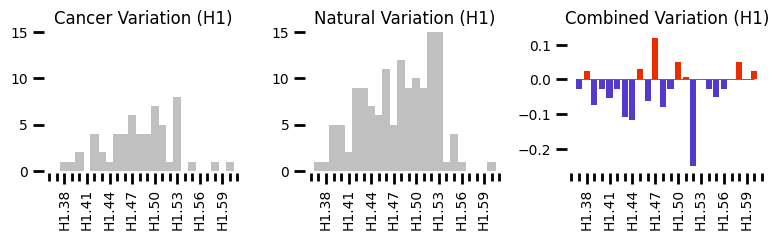

['H2.36', 'H2.36', 'H2.37', 'H2.37', 'H2.38', 'H2.39', 'H2.39', 'H2.40', 'H2.40', 'H2.41', 'H2.41', 'H2.42', 'H2.42', 'H2.43', 'H2.43', 'H2.44', 'H2.44', 'H2.45', 'H2.45', 'H2.46', 'H2.46', 'H2.47', 'H2.47', 'H2.48', 'H2.48', 'H2.49', 'H2.49', 'H2.50', 'H2.50', 'H2.51', 'H2.51', 'H2.52', 'H2.52', 'H2.53', 'H2.53', 'H2.54', 'H2.54', 'H2.55', 'H2.55', 'H2.56', 'H2.56', 'H2.57', 'H2.57', 'H2.61']


range(36, 62)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10

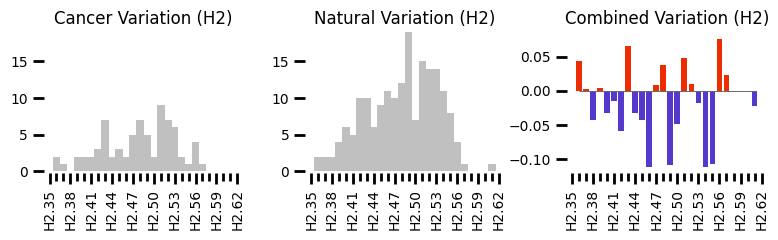

['H3.43', 'H3.44', 'H3.46', 'H3.46', 'H3.47', 'H3.47', 'H3.48', 'H3.48', 'H3.49', 'H3.49', 'H3.50', 'H3.50', 'H3.51', 'H3.51', 'H3.52', 'H3.52', 'H3.53', 'H3.53', 'H3.54', 'H3.54', 'H3.55', 'H3.55', 'H3.56', 'H3.56', 'H3.57', 'H3.57', 'H3.58', 'H3.58', 'H3.59', 'H3.59', 'H3.60', 'H3.60', 'H3.61', 'H3.61', 'H3.62', 'H3.62', 'H3.63', 'H3.63', 'H3.64', 'H3.64', 'H3.65', 'H3.65', 'H3.66', 'H3.66', 'H3.67', 'H3.67', 'H3.68', 'H3.68', 'H3.70', 'H3.70', 'H3.71']


range(43, 72)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S

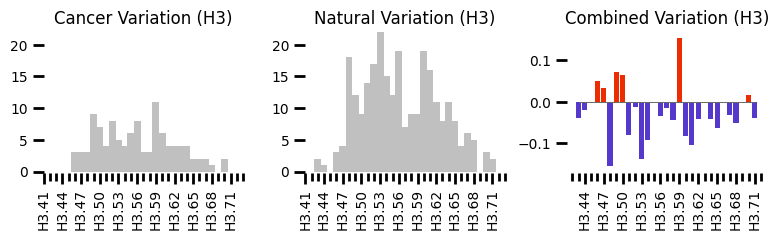

['H4.22', 'H4.25', 'H4.28', 'H4.28', 'H4.29', 'H4.30', 'H4.30', 'H4.31', 'H4.34', 'H4.36', 'H4.37', 'H4.37', 'H4.38', 'H4.38', 'H4.39', 'H4.39', 'H4.40', 'H4.41', 'H4.41', 'H4.42', 'H4.42', 'H4.43', 'H4.43', 'H4.44', 'H4.44', 'H4.45', 'H4.45', 'H4.46', 'H4.46', 'H4.47', 'H4.47', 'H4.48', 'H4.48', 'H4.49', 'H4.49', 'H4.50', 'H4.50', 'H4.51', 'H4.51', 'H4.52', 'H4.52', 'H4.53', 'H4.53', 'H4.54', 'H4.54', 'H4.55', 'H4.55', 'H4.56', 'H4.56', 'H4.57', 'H4.57', 'H4.58', 'H4.58', 'H4.59']


range(22, 60)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5,

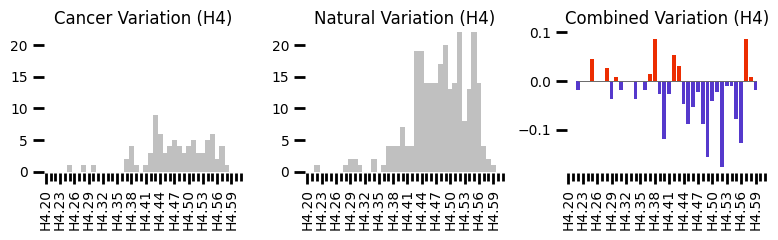

['H5.44', 'H5.44', 'H5.45', 'H5.45', 'H5.46', 'H5.46', 'H5.47', 'H5.47', 'H5.48', 'H5.48', 'H5.49', 'H5.49', 'H5.50', 'H5.50', 'H5.51', 'H5.51', 'H5.52', 'H5.52', 'H5.53', 'H5.53', 'H5.54', 'H5.54', 'H5.55', 'H5.55', 'H5.56', 'H5.56']


range(44, 57)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 

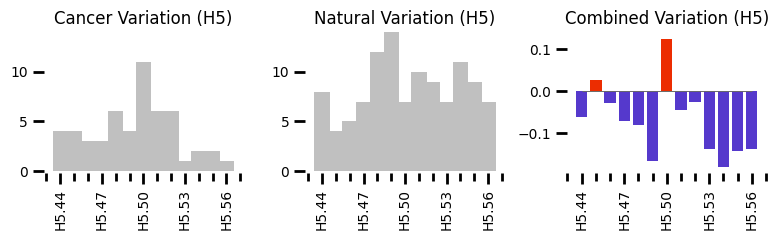

['H6.35', 'H6.35', 'H6.36', 'H6.37', 'H6.37', 'H6.38', 'H6.38', 'H6.39', 'H6.39', 'H6.40', 'H6.40', 'H6.41', 'H6.41', 'H6.42', 'H6.42', 'H6.43', 'H6.43', 'H6.44', 'H6.44', 'H6.45', 'H6.45', 'H6.46', 'H6.46', 'H6.47', 'H6.47', 'H6.48', 'H6.48', 'H6.49', 'H6.49', 'H6.50', 'H6.50', 'H6.51', 'H6.51', 'H6.52', 'H6.52', 'H6.53', 'H6.53', 'H6.54', 'H6.54', 'H6.55', 'H6.55', 'H6.56', 'H6.56', 'H6.57', 'H6.58', 'H6.58', 'H6.59', 'H6.59', 'H6.60', 'H6.61', 'H6.61', 'H6.62', 'H6.62', 'H6.63']


range(35, 64)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5,

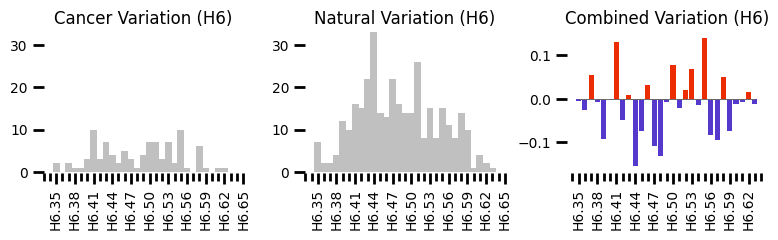

['S1.46', 'S1.46', 'S1.47', 'S1.47', 'S1.48', 'S1.48', 'S1.49', 'S1.49', 'S1.50', 'S1.50', 'S1.51', 'S1.51', 'S1.52', 'S1.52', 'S10.41', 'S10.42', 'S10.43', 'S10.43', 'S10.44', 'S10.44', 'S10.45', 'S10.45', 'S10.46', 'S10.46', 'S10.47', 'S10.47', 'S10.48', 'S10.48', 'S10.49', 'S10.49', 'S10.50', 'S10.50', 'S10.51', 'S10.51', 'S10.52', 'S10.52', 'S10.53', 'S10.53', 'S11.47', 'S11.48', 'S11.48', 'S11.49', 'S11.49', 'S11.50', 'S11.50', 'S11.51', 'S11.51', 'S12.50', 'S12.50', 'S12.51', 'S12.51', 'S12.52', 'S12.52', 'S12.53', 'S12.53', 'S12.54', 'S12.54', 'S12.55', 'S12.55', 'S13.45', 'S13.45', 'S13.46', 'S13.46', 'S13.47', 'S13.47', 'S13.48', 'S13.48', 'S13.49', 'S13.49', 'S13.50', 'S13.50', 'S13.51', 'S13.51', 'S14.44', 'S14.46', 'S14.46', 'S14.47', 'S14.48', 'S14.48', 'S14.49', 'S14.49', 'S14.50', 'S14.50', 'S14.51', 'S14.51', 'S14.52', 'S14.52', 'S14.53', 'S14.53', 'S14.54']


range(41, 56)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 

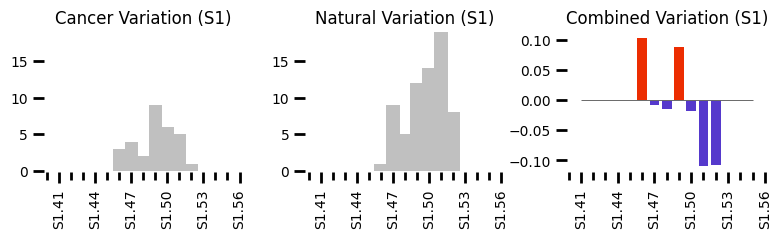

['S2.48', 'S2.48', 'S2.49', 'S2.49', 'S2.50', 'S2.50', 'S2.51', 'S2.51', 'S2.52', 'S2.52', 'S2.53', 'S2.53', 'S2.54', 'S2.54', 'S2.55', 'S2.55', 'S2.56', 'S2.56']


range(48, 57)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 

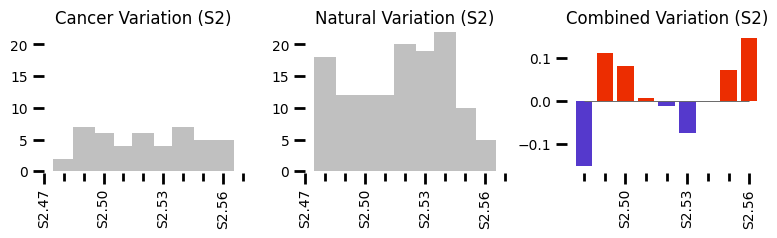

['S3.47', 'S3.47', 'S3.48', 'S3.48', 'S3.49', 'S3.49', 'S3.50', 'S3.50', 'S3.51', 'S3.51', 'S3.52', 'S3.52', 'S3.53', 'S3.53', 'S3.54', 'S3.55', 'S3.55']


range(47, 56)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59

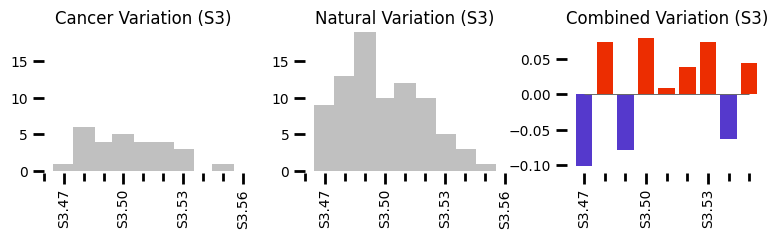

['S4.47', 'S4.48', 'S4.49', 'S4.50', 'S4.51', 'S4.51', 'S4.52', 'S4.53', 'S4.53']


range(47, 54)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6.55': 10, 'S3.50': 5, 'H5.51': 6, 'H5.52': 6, 'S8.52': 7, 'H4.4

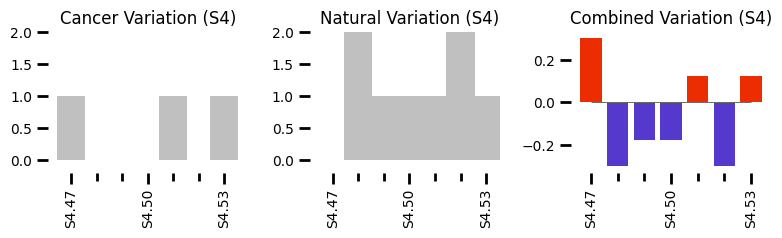

['S5.43', 'S5.44', 'S5.45', 'S5.46', 'S5.46', 'S5.47', 'S5.47', 'S5.48', 'S5.48', 'S5.49', 'S5.49', 'S5.50', 'S5.50', 'S5.51', 'S5.51', 'S5.52', 'S5.54']


range(43, 55)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59

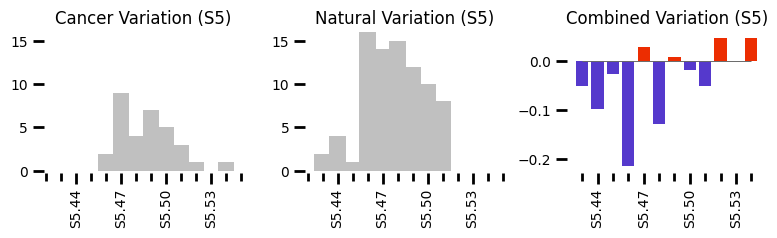

['S6.42', 'S6.42', 'S6.43', 'S6.43', 'S6.44', 'S6.44', 'S6.45', 'S6.45', 'S6.46', 'S6.46', 'S6.47', 'S6.47', 'S6.48', 'S6.48', 'S6.49', 'S6.49', 'S6.50', 'S6.50', 'S6.51', 'S6.51']


range(42, 52)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1

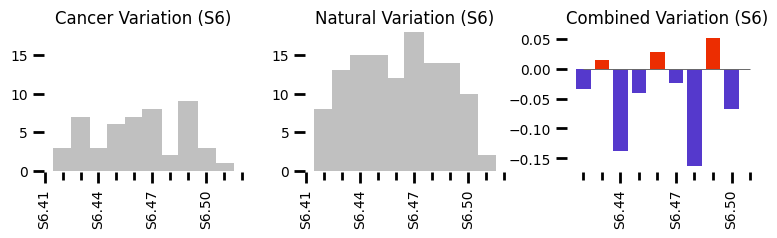

['S7.45', 'S7.46', 'S7.46', 'S7.47', 'S7.47', 'S7.48', 'S7.48', 'S7.49', 'S7.49', 'S7.50', 'S7.50']


range(45, 51)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6.55': 10, 'S3.50': 5, 'H5.51': 6, 'H5.52': 6,

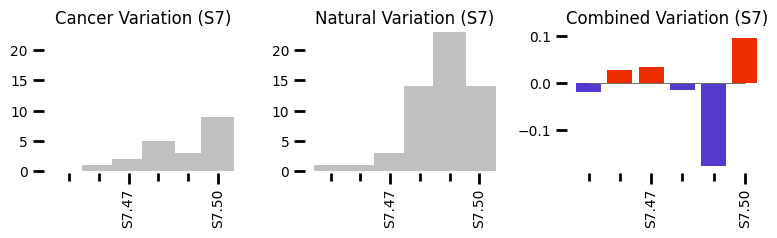

['S8.48', 'S8.49', 'S8.49', 'S8.50', 'S8.50', 'S8.51', 'S8.51', 'S8.52', 'S8.52', 'S8.53', 'S8.53', 'S8.54', 'S8.54', 'S8.55', 'S8.55', 'S8.56', 'S8.56', 'S8.57', 'S8.57', 'S8.58', 'S8.58']


range(48, 59)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42

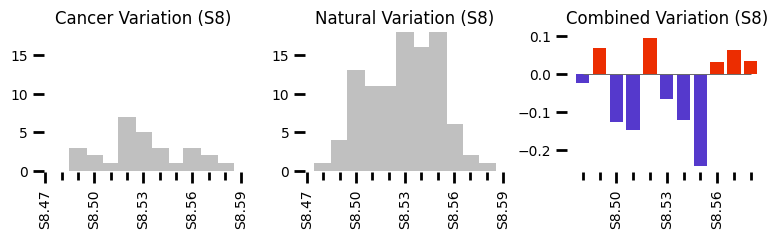

['S9.48', 'S9.48', 'S9.49', 'S9.49', 'S9.50', 'S9.50', 'S9.51', 'S9.51', 'S9.52', 'S9.52', 'S9.53', 'S9.53', 'S9.54', 'S9.54', 'S9.55', 'S9.55']


range(48, 56)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6

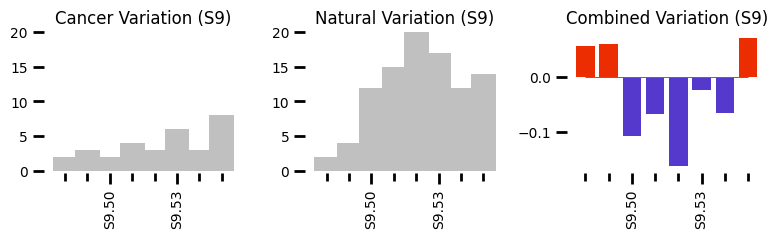

['S10.41', 'S10.42', 'S10.43', 'S10.43', 'S10.44', 'S10.44', 'S10.45', 'S10.45', 'S10.46', 'S10.46', 'S10.47', 'S10.47', 'S10.48', 'S10.48', 'S10.49', 'S10.49', 'S10.50', 'S10.50', 'S10.51', 'S10.51', 'S10.52', 'S10.52', 'S10.53', 'S10.53']


range(41, 54)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6

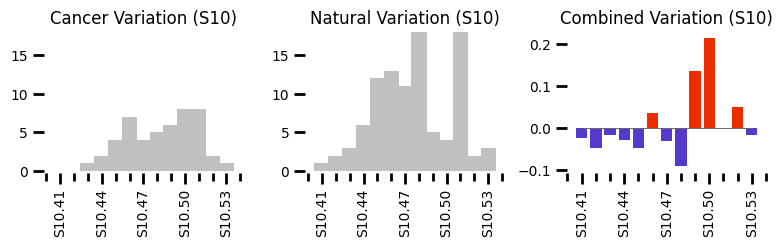

['S11.47', 'S11.48', 'S11.48', 'S11.49', 'S11.49', 'S11.50', 'S11.50', 'S11.51', 'S11.51']


range(47, 52)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6.55': 10, 'S3.50': 5, 'H5.51': 6, 'H5.52': 6, 'S8.52':

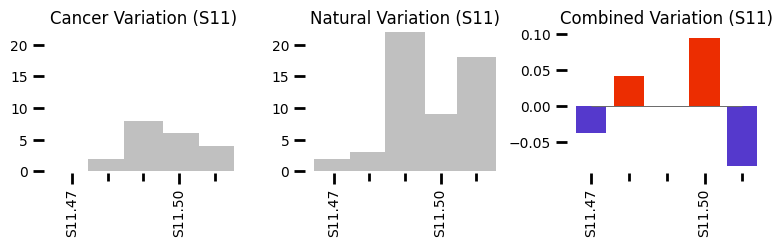

['S12.50', 'S12.50', 'S12.51', 'S12.51', 'S12.52', 'S12.52', 'S12.53', 'S12.53', 'S12.54', 'S12.54', 'S12.55', 'S12.55']


range(50, 56)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6.55': 10, 'S3.50': 5, 'H

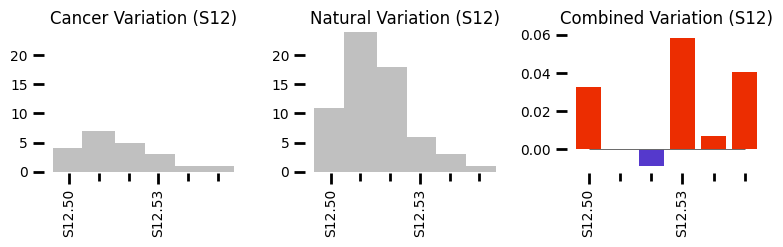

['S13.45', 'S13.45', 'S13.46', 'S13.46', 'S13.47', 'S13.47', 'S13.48', 'S13.48', 'S13.49', 'S13.49', 'S13.50', 'S13.50', 'S13.51', 'S13.51']


range(45, 52)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, 'H4.46': 4, 'H6.59': 1, 'H6.55'

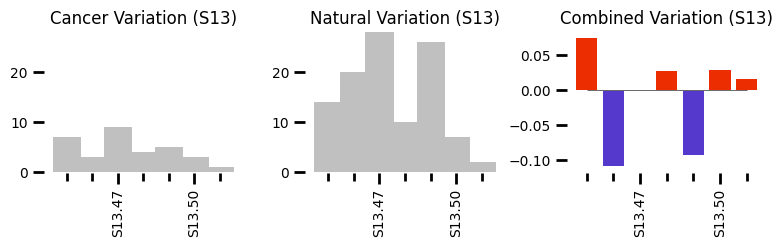

['S14.44', 'S14.46', 'S14.46', 'S14.47', 'S14.48', 'S14.48', 'S14.49', 'S14.49', 'S14.50', 'S14.50', 'S14.51', 'S14.51', 'S14.52', 'S14.52', 'S14.53', 'S14.53', 'S14.54']


range(44, 55)
{'S2.48': 2, 'H3.50': 7, 'S5.49': 7, 'H3.54': 4, 'H1.53': 8, 'H2.42': 3, 'H2.54': 2, 'S9.49': 3, 'S11.51': 4, 'H3.60': 6, 'S9.48': 2, 'H1.47': 6, 'H2.53': 6, 'H2.51': 9, 'H6.50': 7, 'H3.63': 4, 'H5.46': 3, 'S7.49': 3, 'H6.61': 1, 'H5.49': 4, 'S2.52': 6, 'S5.50': 5, 'S9.53': 6, 'H2.49': 5, 'H3.52': 8, 'S14.48': 5, 'S5.47': 9, 'H4.51': 5, 'H5.48': 6, 'S6.45': 6, 'H6.42': 3, 'H5.50': 11, 'GPS.+1': 3, 'H6.58': 6, 'H1.40': 2, 'S14.51': 6, 'H3.65': 2, 'H6.62': 1, 'S8.57': 2, 'H2.48': 7, 'S8.53': 5, 'H3.51': 4, 'S6.49': 9, 'S3.47': 1, 'S6.48': 2, 'H2.52': 7, 'H1.42': 4, 'H3.59': 11, 'S10.49': 6, 'H6.44': 4, 'S3.48': 6, 'S6.43': 7, 'S7.48': 5, 'H1.49': 4, 'S2.54': 7, 'H1.43': 2, 'S6.51': 1, 'H1.46': 4, 'S2.53': 4, 'H6.51': 7, 'H6.45': 2, 'H6.40': 3, 'S1.49': 9, 'S3.51': 4, 'H1.60': 1, 'S6.42': 3, 'H1.48': 4, '

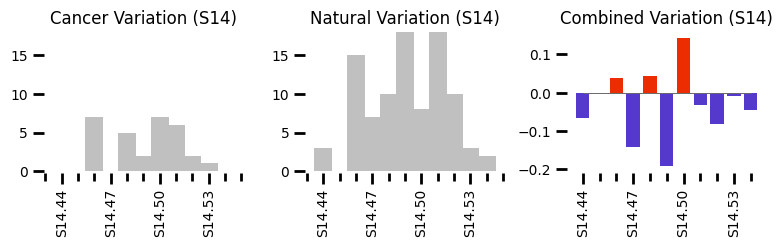

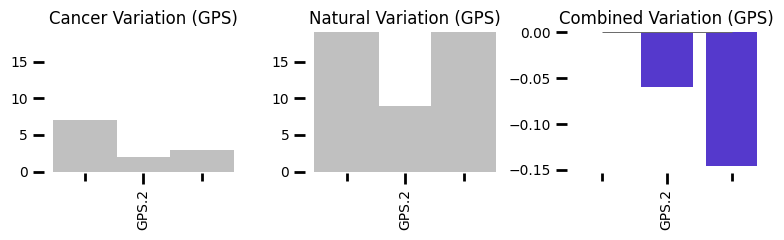

In [4]:
score_dict = {}

for sse in segments:
# mutations, mut_counts
# snps, snp_counts
    varkeys = [k for k in GainMutations.mut_counts.keys() if sse in k]+[k for k in GainMutations.snp_counts.keys() if sse in k]
    #print(subkeys)
    if sse == "GPS":
        x_range = (1,2,3)
        mut_y = [GainMutations.mut_counts["GPS.-2"], GainMutations.mut_counts["GPS.-1"], GainMutations.mut_counts["GPS.+1"]]
        var_y = [GainMutations.snp_counts["GPS.-2"], GainMutations.snp_counts["GPS.-1"], GainMutations.snp_counts["GPS.+1"]]
    if sse != 'GPS':
        x_positions = [int(x.split('.')[-1]) for x in varkeys]
        x_range = range(min(x_positions), max(x_positions)+1)
        print(sorted(varkeys),"\n", x_range, GainMutations.mut_counts, sep="\n")
        mut_y = gaingrn.utils.mutation_utils.compose_y(x_range, sse, GainMutations.mut_counts)
        var_y = gaingrn.utils.mutation_utils.compose_y(x_range, sse, GainMutations.snp_counts)

    
    # Populate the score_dict with the score values
    score_y = gaingrn.utils.mutation_utils.score(mut_y,var_y)
    if sse != "GPS":
        for j,x in enumerate(x_range):
            label = f"{sse}{x}"
            score_dict[label] = score_y[j]

    # Plot the cancer enrichment score per segment
    gaingrn.utils.mutation_utils.plot_segment_enrichment_score(sse=sse, res_range=x_range, mutations=mut_y, variants=var_y, scores=score_y, savename=f"../../TESTING/{sse}variants.svg", show=True)

#### Enrichment Score can now be written to B-factor for evaluation

**Adjust the PDB path to a GAIN PDB you have on your drive.** 

You may also download the PDB dataset from 

https://dx.doi.org/10.5281/zenodo.12515545/agpcr_gains.tgz : download via `gaingrn.utils.io.download_pdbs(target_directory=my/dir/to/pdbs)`

In [ ]:
l1_pdb = gaingrn.utils.io.find_pdb(name="O94910", pdb_folder="../../all_pdbs/")

for i, gain in enumerate(appended_human_collection.collection):
    if "AGRL1" in gain.name: 
        l1_gain = human_collection.collection[i]
        break

gaingrn.utils.io.grn_score2b(l1_pdb, "../../TESTING/l1_gain_score.pdb", l1_gain.reverse_grn_labels, score_dict)

### 3. Enable parsing data for every GRN label position
Provides a full list of mutations with corresponding info on receptor, impact etc. at each GRN label position.

In [7]:
enriched_positions = ["S7.49", "S14.50"]#['GPS.-2']#['H2.55','H3.59','H4.37','H4.57','H5.50','H6.41','H6.55','S10.49','S10.50','S11.50','S14.48','S14.50']

# a) Query via dedicated function into text file
for label in enriched_positions:
    gaingrn.utils.mutation_utils.query_position_variants(GainMutations.generalized_mutations, label, return_aa=True, text_out=f"../../TESTING/{label}.out")

# b)  adress the object directly, i.e. with SNPs
for snp in GainMutations.snps["S7.49"]:
    print(snp["resname"],snp["receptor"],snp["HGVS Consequence"])

# c) define your own criteria for parsing the data
poly = lambda n : n > 0.446 # > 0.446 for possibly damaging, > 0.908 for Probably Damaging
sift = lambda n : n < 0.05 # For deleterious impacts

missense_dict = gaingrn.utils.mutation_utils.query_by_criteria(("consequence", "missense"), poly=lambda n : n > 0.446, mutation_dict=GainMutations.generalized_mutations)

CANCER GENOME ATLAS MUTATIONS AT POSITION S7.49 
TOTAL: 6 MUTATIONS

id                             9fa2c490-1d26-5916-a5c1-d6200a15e534
y                              1
genomic_dna_change             chr3:g.48646243G>A
x                              2437
consequence                    missense
impact                         MODERATE
sift_impact                    tolerated
polyphen_impact                probably_damaging
sift_score                     0.09
polyphen_score                 1
aa_change                      P2437L
receptor                       Q9NYQ7_O75092-CELR3_HUMAN-CadherinEGFLAGseven-passG-typereceptor3-Homo_sapiens

______________________________
id                             111f6088-f53c-5717-9009-887efba9d1b6
y                              1
genomic_dna_change             chr1:g.78926984C>T
x                              329
consequence                    missense
impact                         MODERATE
sift_impact                    tolerated
polyphen_impact   

You can also directly parse the variants from the SNP CSV file.

In [ ]:
variants = gaingrn.utils.mutation_utils.retrieve_csv_vars(human_collection.collection[0].name, csvs, filter_str='missense_variant', with_resid=True)

# Filter for VEP annotation to only get the missense mutation
for var in variants:
    if 'Protein Consequence' not in var.keys():
        continue
    #print(var['Protein Consequence'])
    #print(re.findall('[A-z]{3}', var['Protein Consequence']))
    res = oneletter[re.findall('[A-z]{3}', var['Protein Consequence'])[0]] # A, D, ...
    resnum = int(re.findall('[\d]+', var['Protein Consequence'])[0]) # 1364
    print(res, resnum)

### 4. Collect and compile variant data for unindexed loops

In [ ]:
loop_lengths = {}
loop_seqs = {}
loop_seq = {}
loop_info = {}

# Check for the indexing and collection to be in the same order
for i, n in enumerate(human_indexing.names):
    assert(n == appended_human_collection.collection[i].name)

for idx, gain in enumerate(human_collection.collection):
    curr_name = gain.name
    intervals = human_indexing.intervals[i]
    named_dir = human_indexing.indexing_dirs[idx]
    
    i_loc, i_dir = gaingrn.utils.mutation_utils.get_loop_stats(intervals, gain.sequence)
    for k, seq in i_dir.items():
        if k not in loop_info.keys():
            loop_info[k] = []
        loop_info[k].append({'name':f'{gain.name}_{i_loc[k][0]+gain.start}-{i_loc[k][1]+gain.start}', 'sequence':''.join(seq)})

#for loop in loop_info.keys():
#    gaingrn.utils.mutation_utils.loop2fasta(f"../loops_human/{loop}.fa", loop_info[loop])


Construct a labeled dict with each connector containing the corresponding mutations for this - independent of the receptor:

i.e. "H6-S1": [{mut1}, {mut2}]

we rather not use the Alignment to sort mutations, since the loops themselves have too much variability as shown in the ALN. Subfamily-level.

In [ ]:
loop_muts, loop_counts = gaingrn.utils.mutation_utils.compose_loop_vars(human_collection, jsons, resid_key='x', aa_key='aa_change', fasta_offsets=human_fasta_offsets)

for loop in loop_counts.keys():
    print(loop, loop_counts[loop])


### 5. Get the TOP10 cancer- and variance-enriched positions and plot them

The overall quality for S4 is very low with a Max of 2 variants per score, therefore it was excluded in the Figure.

In [ ]:
vm_arr = GainMutations.generate_data_array(return_list=True)

print(vm_arr)

vm_arr.sort(key=lambda x: x[4])

#np.save("../datavarmut.pkl", varmut_arr, allow_pickle=True)

pos = []
val = []

for tup in vm_arr[:10]:
    print(tup)
    pos.append(tup[0]+"."+str(tup[1]))
    val.append(tup[4])

fig, ax = plt.subplots(figsize=[3,2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=8)
plt.tick_params(which='minor', length=6)
plt.bar(range(len(val)),height=[-v for v in val], color="#9090f7")
plt.xticks(ticks=range(len(val)), labels=pos, rotation=90,fontname="FreeSans")
plt.yticks(ticks=[0,0.1,0.2],fontname="FreeSans")
plt.ylim(0, 0.25)
plt.savefig("../TESTING/var_enriched.elem.svg")

pos=[]
val=[]

for tup in vm_arr[:-10:-1]:
    print(tup)
    pos.append(tup[0]+"."+str(tup[1]))
    val.append(tup[4])

fig, ax = plt.subplots(figsize=[3,2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=8)
plt.tick_params(which='minor', length=6)
plt.bar(range(len(val)),height=val, color='#f01717')
plt.xticks(ticks=range(len(val)), labels=pos, rotation=90, fontname="FreeSans")
plt.yticks(ticks=[0,0.1,0.2],fontname="FreeSans")
plt.ylim(0, 0.25)
plt.savefig("../TESTING/mut_enriched.elem.svg")